In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
data = pd.read_csv('my-idea.csv',encoding='ansi')

In [3]:
data.columns

Index(['index', 'g3b4', 'gu', 'dong', 'high_count', 'low_count',
       'high_bus_sum', 'low_bus_sum', 'high_sub_average', 'low_sub_average',
       'average_trade', 'average_sizetrade', 'year'],
      dtype='object')

In [4]:
g3=data[(data['g3b4']==1)]

In [5]:
g3

index  g3b4   gu dong  high_count  low_count  high_bus_sum  low_bus_sum  \
0        1     1  강남구  개포동           1          0             5            0   
1        2     1  강남구  논현동          20          2            52            7   
2        3     1  강남구  대치동          26          3            45            4   
3        4     1  강남구  도곡동           6          1            28            4   
4        5     1  강남구  삼성동          20          1            45            0   
..     ...   ...  ...  ...         ...        ...           ...          ...   
148    164     1  송파구  신천동           7          2            13            5   
149    165     1  송파구  오금동           2          0             5            0   
150    166     1  송파구  잠실동           7          1             9            4   
151    167     1  송파구  장지동           2          1             6            3   
152    168     1  송파구  풍납동           0          1             0            1   

     high_sub_average  low_sub_average  average_trade  average_sizetrade  year  
0         1029.502173         0.000000   142210.62800        2350.950643  2018  
1          419.247440       421.109606   113205.61800        1199.528213  2018  
2          514.592585       565.141633   190018.34450        1929.110361  2018  
3          413.884446       162.182751   162690.87180        1478.389307  2018  
4          470.456501       750.724139   172511.37120        1773.421078  2018  
..                ...              ...            ...                ...   ...  
148        245.276827       204.296845   175000.50810        1969.937047  2020  
149        190.955176         0.000000    99775.86788        1250.131272  2020  
150        551.556183       177.950584   194692.40660        2379.483057  2020  
151       1749.685274      1507.813878   118473.17070        1677.511480  2020  
152          0.000000       458.589662    96334.32288        1338.296229  2020  

[87 rows x 13 columns]

In [6]:
bed4=data[(data['g3b4']==0)]

In [7]:
bed4

index  g3b4   gu   dong  high_count  low_count  high_bus_sum  \
11      12     0  강북구    미아동           3          1            16   
12      13     0  강북구     번동           2          0            14   
13      14     0  강북구    수유동           2          1            13   
14      15     0  강북구    우이동           0          2             0   
15      16     0  노원구    공릉동           2          1             9   
..     ...   ...  ...    ...         ...        ...           ...   
136    151     0  성북구  성북동1가           1          0             5   
137    153     0  성북구    장위동           0          1             0   
138    154     0  성북구    정릉동           0          2             0   
139    155     0  성북구    종암동           2          0             6   
140    156     0  성북구   하월곡동           2          2             7   

     low_bus_sum  high_sub_average  low_sub_average  average_trade  \
11             3        363.679950       122.574184    46644.73434   
12             0        558.622614         0.000000    34048.94336   
13             1        644.012309       622.090160    35191.66667   
14             4          0.000000       232.337772    38089.70588   
15             4        592.145167       501.387393    36689.59829   
..           ...               ...              ...            ...   
136            0        252.455200         0.000000    70625.00000   
137            5          0.000000       975.817059    67052.96667   
138            6          0.000000       595.839293    53779.14070   
139            0        647.261985         0.000000    74888.22404   
140            5        358.119248       459.502155    70051.12033   

     average_sizetrade  year  
11          611.833019  2018  
12          516.053450  2018  
13          460.761541  2018  
14          465.259590  2018  
15          559.081931  2018  
..                 ...   ...  
136         990.149457  2020  
137         972.117800  2020  
138         749.057065  2020  
139        1005.229062  2020  
140         903.532288  2020  

[66 rows x 13 columns]

In [8]:
g3=g3.drop(['index','gu','dong','year','g3b4'],axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# define the scaler
trans = MinMaxScaler()

In [11]:
# transform the data
g3 = trans.fit_transform(g3)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# define the scaler
trans = StandardScaler()

In [14]:
# transform the data
g3 = trans.fit_transform(g3)

In [15]:
g3=pd.DataFrame(g3,columns=['high_count','low_count','high_bus_sum','low_bus_sum','high_sub_average','low_sub_average','average_trade','average_sizetrade'])

In [16]:
g3.describe()

high_count     low_count  high_bus_sum   low_bus_sum  \
count  8.700000e+01  8.700000e+01  8.700000e+01  8.700000e+01   
mean  -1.135745e-16  1.454775e-16 -6.891039e-17  5.933951e-17   
std    1.005797e+00  1.005797e+00  1.005797e+00  1.005797e+00   
min   -8.505433e-01 -8.882162e-01 -6.458370e-01 -7.173224e-01   
25%   -6.833178e-01 -8.882162e-01 -5.687165e-01 -7.173224e-01   
50%   -3.488669e-01 -3.115385e-01 -3.593893e-01 -2.445417e-01   
75%    3.200349e-01  2.651392e-01  5.926504e-02  4.646293e-01   
max    3.162868e+00  3.148527e+00  4.378015e+00  4.956046e+00   

       high_sub_average  low_sub_average  average_trade  average_sizetrade  
count         87.000000     8.700000e+01   8.700000e+01       8.700000e+01  
mean           0.000000     1.288880e-16   7.018651e-17      -5.232086e-17  
std            1.005797     1.005797e+00   1.005797e+00       1.005797e+00  
min           -1.397429    -9.028424e-01  -1.666899e+00      -1.477783e+00  
25%           -0.329631    -9.028424e-01  -7.121234e-01      -8.059955e-01  
50%           -0.118189    -1.937647e-01  -1.334916e-01      -2.578462e-01  
75%            0.116452     5.172360e-01   6.650943e-01       6.234804e-01  
max            4.059826     3.867230e+00   2.988514e+00       2.613070e+00

In [17]:
corr = g3.corr()

In [18]:
print(corr)

                   high_count  low_count  high_bus_sum  low_bus_sum  \
high_count           1.000000   0.582988      0.900222     0.530818   
low_count            0.582988   1.000000      0.523229     0.686900   
high_bus_sum         0.900222   0.523229      1.000000     0.599367   
low_bus_sum          0.530818   0.686900      0.599367     1.000000   
high_sub_average    -0.030256   0.008181     -0.018053     0.032811   
low_sub_average      0.316578   0.378972      0.223464     0.184450   
average_trade        0.232069   0.116633      0.137110     0.131053   
average_sizetrade    0.127200   0.064587      0.047358     0.154992   

                   high_sub_average  low_sub_average  average_trade  \
high_count                -0.030256         0.316578       0.232069   
low_count                  0.008181         0.378972       0.116633   
high_bus_sum              -0.018053         0.223464       0.137110   
low_bus_sum                0.032811         0.184450       0.131053   
high_

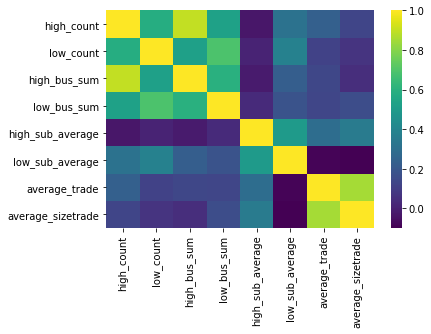

In [19]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [20]:
g3.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
bed4=bed4.drop(['index','gu','dong','year','g3b4'],axis=1)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# define the scaler
trans = MinMaxScaler()

In [24]:
# transform the data
bed4 = trans.fit_transform(bed4)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# define the scaler
trans = StandardScaler()

In [27]:
# transform the data
bed4 = trans.fit_transform(bed4)

In [28]:
bed4=pd.DataFrame(bed4,columns=['high_count','low_count','high_bus_sum','low_bus_sum','high_sub_average','low_sub_average','average_trade','average_sizetrade'])

In [29]:
bed4.describe()

high_count     low_count  high_bus_sum   low_bus_sum  \
count  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01   
mean  -1.850372e-16 -1.682156e-18  3.364312e-18  3.280204e-17   
std    1.007663e+00  1.007663e+00  1.007663e+00  1.007663e+00   
min   -8.691608e-01 -9.522795e-01 -9.093940e-01 -8.614774e-01   
25%   -8.691608e-01 -7.967091e-01 -9.093940e-01 -8.241693e-01   
50%   -1.609557e-01 -3.299978e-01 -4.950855e-02 -2.645482e-01   
75%    5.472494e-01  2.922838e-01  6.383998e-01  4.069972e-01   
max    4.088275e+00  4.025974e+00  3.390033e+00  4.212421e+00   

       high_sub_average  low_sub_average  average_trade  average_sizetrade  
count      6.600000e+01     6.600000e+01   6.600000e+01       6.600000e+01  
mean       1.766264e-17     8.074349e-17   4.541821e-16      -1.682156e-17  
std        1.007663e+00     1.007663e+00   1.007663e+00       1.007663e+00  
min       -8.662876e-01    -1.066018e+00  -2.421062e+00      -1.437914e+00  
25%       -8.662876e-01    -9.842647e-01  -8.332453e-01      -7.405357e-01  
50%       -2.692998e-01    -2.878800e-01  -9.377576e-02      -2.547110e-01  
75%        9.084255e-01     6.605757e-01   5.784504e-01       6.872917e-01  
max        2.832770e+00     3.377818e+00   2.725450e+00       3.011489e+00

In [30]:
corr = bed4.corr()

In [31]:
print(corr)

                   high_count  low_count  high_bus_sum  low_bus_sum  \
high_count           1.000000   0.574553      0.918412     0.585137   
low_count            0.574553   1.000000      0.440922     0.929988   
high_bus_sum         0.918412   0.440922      1.000000     0.427866   
low_bus_sum          0.585137   0.929988      0.427866     1.000000   
high_sub_average     0.581835   0.206838      0.652370     0.220591   
low_sub_average      0.094582   0.350067      0.086662     0.260581   
average_trade        0.048023  -0.088885     -0.016070     0.004864   
average_sizetrade    0.269536   0.015881      0.206080     0.111930   

                   high_sub_average  low_sub_average  average_trade  \
high_count                 0.581835         0.094582       0.048023   
low_count                  0.206838         0.350067      -0.088885   
high_bus_sum               0.652370         0.086662      -0.016070   
low_bus_sum                0.220591         0.260581       0.004864   
high_

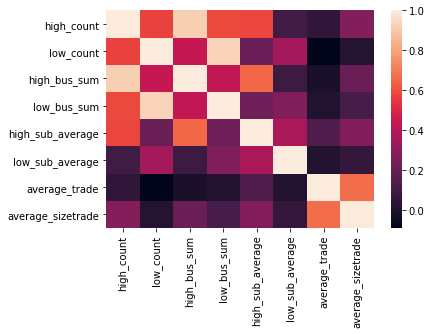

In [34]:
sns.heatmap(corr, fmt='d')
plt.show()

In [33]:
bed4.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]